Plotting results from the CountSketch algorithm 

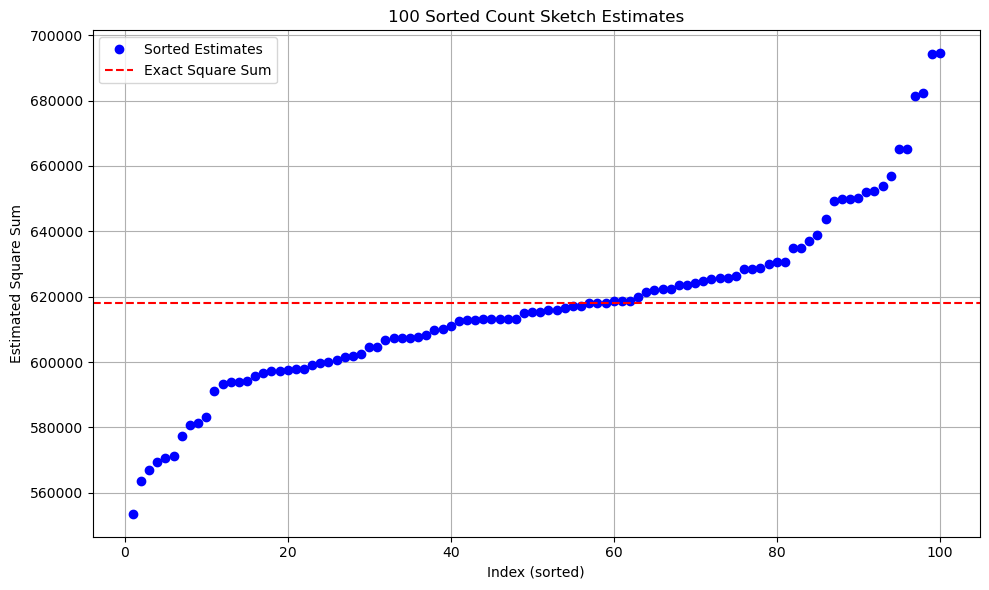

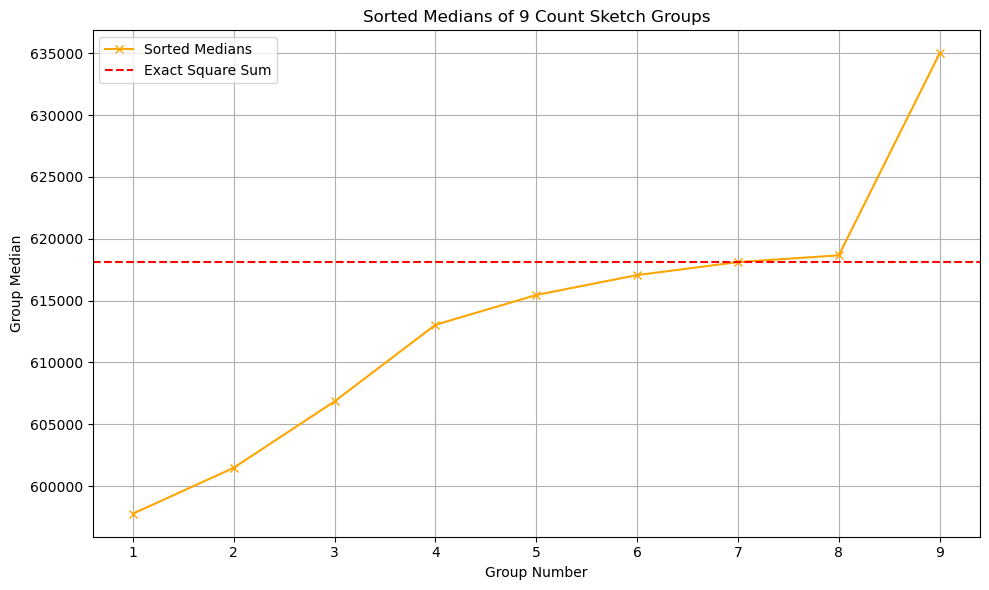

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filstier
estimateFilePath = 'estimates.csv'
medianFilePath = 'medians.csv'

# Læs estimater og medianer
estimates = pd.read_csv(estimateFilePath, index_col='Index')
medians = pd.read_csv(medianFilePath, index_col='Index')

# Hent S_exact og fjern den fra data
if -1 in estimates.index:
    S_exact = estimates.loc[-1, "EstimatedSquareSum"]
    estimates = estimates.drop(index=-1)
else:
    raise ValueError("S_exact mangler i estimates.csv")

if -1 in medians.index:
    medians = medians.drop(index=-1)

# ░░░░░░ PLOT 1: Sorted estimates ░░░░░░

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), estimates, marker='o', linestyle='', color='blue', label='Sorted Estimates')
plt.axhline(S_exact, color='red', linestyle='--', label='Exact Square Sum')
plt.title("100 Sorted Count Sketch Estimates")
plt.xlabel("Index (sorted)")
plt.ylabel("Estimated Square Sum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ░░░░░░ PLOT 2: Medians from medians.csv ░░░░░░

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), medians, marker='x', linestyle='-', color='orange', label='Sorted Medians')
plt.axhline(S_exact, color='red', linestyle='--', label='Exact Square Sum')
plt.title("Sorted Medians of 9 Count Sketch Groups")
plt.xlabel("Group Number")
plt.ylabel("Group Median")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
